In [1]:
import pandas as pd
df = pd.read_csv("filename.csv")
print(df.shape)
df.head()

(10011, 36)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588703228027637762,1588657407215169537,2022-11-05 01:22:20 UTC,2022-11-05,01:22:20,0,1465312236650520576,fabhcoir,AOIBHEIL the WOKE GRANNY 🐀says NO DM's,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nosuperhero', 'name': 'No Su...",NaN,NaN,NaN,NaN
1,1588703223648747521,1588702582540996608,2022-11-05 01:22:19 UTC,2022-11-05,01:22:19,0,2443158750,easye_coli,EasyE Coli,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TrentTelenko', 'name': 'Tren...",NaN,NaN,NaN,NaN
2,1588703216065482752,1588662194207850496,2022-11-05 01:22:18 UTC,2022-11-05,01:22:18,0,1404527258279219201,__wrigley,Wrigley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KingJon33', 'name': 'jon', '...",NaN,NaN,NaN,NaN
3,1588703200181645312,1588703200181645312,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,168863219,nickmmaier,Nick Maier,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1588703199577661440,1588660207336722432,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,1554860205049085957,alfred_wickham,Alfred Wickham,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kevin_of_Irl', 'name': 'kevi...",NaN,NaN,NaN,NaN


# ANALYSIS 1


a quick peek at all column names in the dataset

In [2]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

lets use username, tweet and language

In [3]:
df1 = df[["username", "tweet", "language"]]
df1.head()

,username,tweet,language
0,fabhcoir,@nosuperhero @SassyLynn14 @ReallyActivist @elo...,en
1,easye_coli,"@TrentTelenko Is Russia using any ""armored"" tr...",en
2,__wrigley,@KingJon33 @sonny0411 @KyivIndependent Because...,en
3,nickmmaier,The sky is falling! Why don’t you curl up in ...,en
4,alfred_wickham,@kevin_of_Irl @Maks_NAFO_FELLA China is the re...,en


In [4]:
# check for null values
df1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

no null values

In [5]:
# look at how many tweets are posted in which language
df1.language.value_counts()

en     8846
pt      395
it      154
qme     143
in      105
und      47
es       41
ja       33
ru       33
de       26
fr       25
fi       21
ca       21
qht      20
vi       16
th       13
pl       10
nl       10
ro        8
hi        7
tl        6
uk        4
zh        4
et        4
qam       3
ar        3
sv        2
tr        2
no        2
cs        2
ta        1
ur        1
zxx       1
ko        1
ht        1
Name: language, dtype: int64

we may plot the above in a histogram to view the distribution graphically


In [6]:
len(df1.language.value_counts())

35

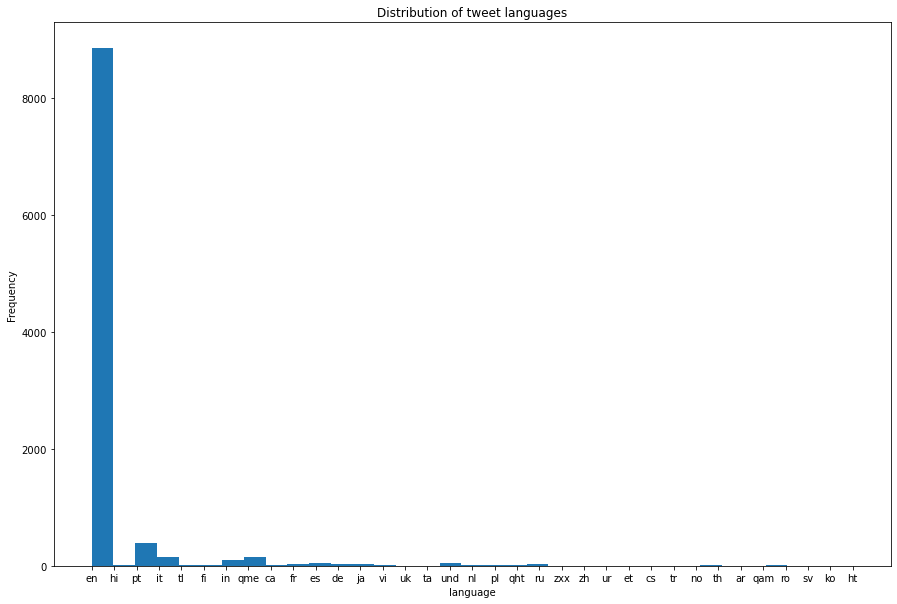

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 10))
plt.xlabel("language")
plt.ylabel("Frequency")
plt.title("Distribution of tweet languages")
plt.hist(df1.language,35)
plt.show()

most tweets are in english, hence prep it by removing all links, punctuation,symbols and other language errors

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re
import string

In [11]:
# function to clean our text
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text




In [12]:
df1["tweet"] = df1["tweet"].apply(clean)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19732\3522177448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tweet"] = df1["tweet"].apply(clean)


In [13]:
df1.head()

,username,tweet,language
0,fabhcoir,nosuperhero reallyactivist elonmusk agre musk...,en
1,easye_coli,trenttelenko russia use armor train high visib...,en
2,__wrigley,kyivindepend war must end mankind slav must ...,en
3,nickmmaier,sky fall don't curl fetal posit suck thumb bi...,en
4,alfred_wickham,kevinofirl maksnafofella china real big bad mo...,en


wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<function matplotlib.pyplot.show(close=None, block=None)>

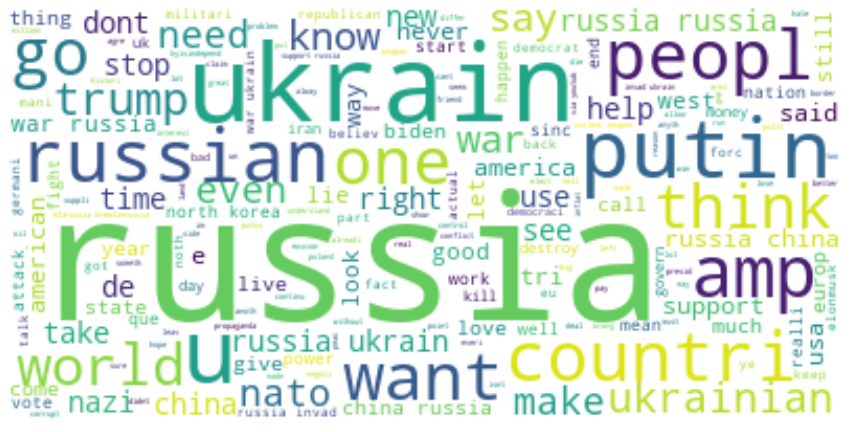

In [15]:
text = " ".join(i for i in df1.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [16]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sentiments = SentimentIntensityAnalyzer()
df1["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1.tweet]
df1["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1.tweet]
df1["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df1.tweet]

df2 = df1[["tweet", "positive", "negative", "neutral"]]
df2.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19732\2152799405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df1.tweet]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19732\2152799405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df1.tweet]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19732\2152799405.py:4: SettingWithCopyWarning: 
A value is trying 

,tweet,positive,negative,neutral
0,nosuperhero reallyactivist elonmusk agre musk...,0.221,0.103,0.676
1,trenttelenko russia use armor train high visib...,0.000,0.000,1.000
2,kyivindepend war must end mankind slav must ...,0.062,0.341,0.597
3,sky fall don't curl fetal posit suck thumb bi...,0.000,0.132,0.868
4,kevinofirl maksnafofella china real big bad mo...,0.000,0.304,0.696


let’s have a look at the most frequent words used by people with positive sentiments:

<function matplotlib.pyplot.show(close=None, block=None)>

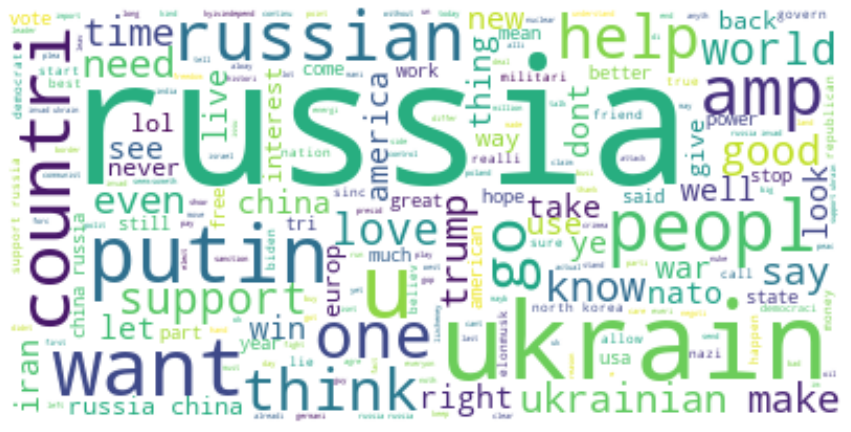

In [18]:
text = " ".join([i for i in df2.tweet[df2.positive > df2.negative]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

Now let’s have a look at the most frequent words used by people with negative sentiments

<function matplotlib.pyplot.show(close=None, block=None)>

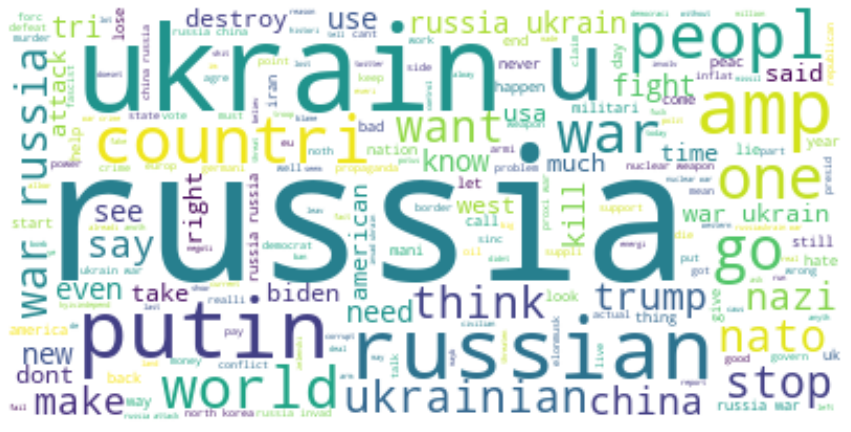

In [19]:
text = " ".join([i for i in df2.tweet[df2.negative > df2.positive]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize= (15,10))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show

in this section, the following was accomplished:
1. Graphically display distribution of tweet languages in a histogram
2. Show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war
3. have a look at the most frequent words used by people with positive sentiments
4. have a look at the most frequent words used by people with negative sentiments

# ANALYSIS 2

In [20]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588703228027637762,1588657407215169537,2022-11-05 01:22:20 UTC,2022-11-05,01:22:20,0,1465312236650520576,fabhcoir,AOIBHEIL the WOKE GRANNY 🐀says NO DM's,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nosuperhero', 'name': 'No Su...",NaN,NaN,NaN,NaN
1,1588703223648747521,1588702582540996608,2022-11-05 01:22:19 UTC,2022-11-05,01:22:19,0,2443158750,easye_coli,EasyE Coli,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TrentTelenko', 'name': 'Tren...",NaN,NaN,NaN,NaN
2,1588703216065482752,1588662194207850496,2022-11-05 01:22:18 UTC,2022-11-05,01:22:18,0,1404527258279219201,__wrigley,Wrigley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KingJon33', 'name': 'jon', '...",NaN,NaN,NaN,NaN
3,1588703200181645312,1588703200181645312,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,168863219,nickmmaier,Nick Maier,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1588703199577661440,1588660207336722432,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,1554860205049085957,alfred_wickham,Alfred Wickham,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kevin_of_Irl', 'name': 'kevi...",NaN,NaN,NaN,NaN


In [21]:
df.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   1
place              10010
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9240
video                  0
thumbnail           9020
near               10011
geo                10011
source             10011
user_rt_id         10011
user_rt            10011
retweet_id         10011
reply_to               0
retweet_date       10011
translate          10011
trans_src          10011
trans_dest         10011
dtype: int64

# create methods for our work

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
df2 = df.copy()
df2.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588703228027637762,1588657407215169537,2022-11-05 01:22:20 UTC,2022-11-05,01:22:20,0,1465312236650520576,fabhcoir,AOIBHEIL the WOKE GRANNY 🐀says NO DM's,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nosuperhero', 'name': 'No Su...",NaN,NaN,NaN,NaN
1,1588703223648747521,1588702582540996608,2022-11-05 01:22:19 UTC,2022-11-05,01:22:19,0,2443158750,easye_coli,EasyE Coli,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TrentTelenko', 'name': 'Tren...",NaN,NaN,NaN,NaN
2,1588703216065482752,1588662194207850496,2022-11-05 01:22:18 UTC,2022-11-05,01:22:18,0,1404527258279219201,__wrigley,Wrigley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KingJon33', 'name': 'jon', '...",NaN,NaN,NaN,NaN
3,1588703200181645312,1588703200181645312,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,168863219,nickmmaier,Nick Maier,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1588703199577661440,1588660207336722432,2022-11-05 01:22:14 UTC,2022-11-05,01:22:14,0,1554860205049085957,alfred_wickham,Alfred Wickham,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kevin_of_Irl', 'name': 'kevi...",NaN,NaN,NaN,NaN


In [27]:
# a function for removing emojis from our data
def remove(df):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', df2)

### Create methods for horizontal bar charting

ensure dataframe's x is always called total

In [28]:
import seaborn as sns

In [30]:
def draw_bar(data, title, ylabel):
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(y=data.index.values, x='total', data=data, orient='h',color=XKCD_COLOR)
    ax.set_yticklabels([label[0] for label in data.index.values])
    ax.set(xlabel='Count', ylabel=ylabel)
    fig.suptitle(title, fontsize=22, fontweight='bold')

def draw_language(data):
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=data[:10], y='language', x='total', orient='h', color=XKCD_COLOR)
    ax.set(xlabel='Count', ylabel='Language')
    fig.suptitle('10 Most Common Languages in Tweets', fontsize=22, fontweight='bold')
    
def draw_user(data):
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=data, y='username', x='total', orient='h', color=XKCD_COLOR)
    ax.set(xlabel='Count', ylabel='User Name')
    fig.suptitle('20 Most Common User Names', fontsize=22, fontweight='bold')


### create a method to extract to a list

for tweet addresses and hashtags, need to extract data to a list


In [31]:
def extract_list(d, fld):
    return_list = []
    for i in d[fld]:
        if len(i) != 0:
            for j in i:
                return_list.append(j.lower())

    return return_list

### word cloud generator method with final cleaning

Terms like, 'Russia' and 'Ukraine' and their pronouns/adjectives aren't meaningful really. Removing them and the term ' s ' provides more meaningful text

In [32]:
def scrub_tweet(text):
    text = re.sub('russian?|ukrain[e|ian]?', '', text)
    text = re.sub(' s ', ' ', text)
    while '  ' in text:
        text = text.replace('  ',' ')
    return text

### tweet cleaning method

cleans up data  for inclusion in word cloud

In [34]:
def clean(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode() # convert unicode to ascii where possible
    text = str(text).lower() # lowercase the text
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # get rid of usernames
    text = ' '.join([word for word in text.split() if not word.startswith('#')]) # get rid of hashtags
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = BeautifulSoup(text, 'html.parser').string # parse any html and return it as a string
    if text is None:
        return ''
    text = re.sub('\[.*?\]', '', text)
    text = remove_emojis(text) # get rid of emojis
    text = re.sub('\n', '', text) # drop all line feeds
    text = re.sub('\w*\d\w*', '', text) # bye digits in words
    text = ' '.join([word for word in text.split(' ') if word not in stopword])
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = ' '.join([word for word in text.split(' ') if len(word) > 3 ])
    while text.find('  ') != -1:
        text = re.sub('\s\s', ' ', text) # strip double spaces
    return text.strip()

### method to create consistent word cloud with only 50 words

In [36]:
def gen_wordcloud(text, group='All'):
    # stop words were already stripped; no need to do it here
    MAXIMUM_WORDS = 50
    CHART_TITLE = '{} Most Common Words in {} Sentiment Tweets'.format(MAXIMUM_WORDS, group)
    fig, ax = plt.subplots(figsize=(12,7))
    wordcloud = WordCloud(background_color="black", colormap='hsv', collocations=False,
                          max_words=MAXIMUM_WORDS, random_state=RANDOM_STATE).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis('off')
    fig.suptitle(CHART_TITLE, fontsize=22, fontweight='bold')
    plt.show()

### method for creating a collocation word cloud

Collocations determine phrases that often appear together. For example, 'collateral damage' is a bigram phrase that appears often together.

In [37]:
def generate_bigram_wordcloud(text, group='All'):
    # stop words were already stripped; no need to do it here
    MAXIMUM_PHRASES = 20
    FREQUENCY = 4
    CHART_TITLE = '{} Most Common Bigram Terms in {} Sentiment Tweets'.format(MAXIMUM_PHRASES, group)
    fig, ax = plt.subplots(figsize=(12,7))
    wordcloud = WordCloud(background_color="black", colormap='hsv', collocations=True,
                          max_words=MAXIMUM_PHRASES, random_state=47, collocation_threshold=FREQUENCY).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
    plt.axis('off')
    fig.suptitle(CHART_TITLE, fontsize=22, fontweight='bold')
    plt.show()

### classification method for sentiment

If the compound score is within a particular range, classify_sentiment score the Tweet as 'Positive' or 'Negative' in tone. 'Neutral' is the defaul

In [38]:
def class_sant(row):
    classify = 'Neutral'
    if row['Compound'] >= 0.05:
        classify = 'Positive'
    elif row['Compound'] <= -0.05:
        classify = 'Negative'
    return classify

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10011 non-null  int64  
 1   conversation_id  10011 non-null  int64  
 2   created_at       10011 non-null  object 
 3   date             10011 non-null  object 
 4   time             10011 non-null  object 
 5   timezone         10011 non-null  int64  
 6   user_id          10011 non-null  int64  
 7   username         10011 non-null  object 
 8   name             10010 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10011 non-null  object 
 11  language         10011 non-null  object 
 12  mentions         10011 non-null  object 
 13  urls             10011 non-null  object 
 14  photos           10011 non-null  object 
 15  replies_count    10011 non-null  int64  
 16  retweets_count   10011 non-null  int64  
 17  likes_count 

tweet data date-time range

In [42]:
df2['created_at'] = pd.to_datetime(df2['created_at'])

In [43]:
df2.created_at.min(), df2.created_at.max()

(Timestamp('2022-11-04 21:59:25+0000', tz='UTC'),
 Timestamp('2022-11-05 01:22:20+0000', tz='UTC'))

### Exploration
only 3 fields needed

In [44]:
df3 = df2[["username", "created_at", "tweet", "language"]]
df3.head()

,username,created_at,tweet,language
0,fabhcoir,2022-11-05 01:22:20+00:00,@nosuperhero @SassyLynn14 @ReallyActivist @elo...,en
1,easye_coli,2022-11-05 01:22:19+00:00,"@TrentTelenko Is Russia using any ""armored"" tr...",en
2,__wrigley,2022-11-05 01:22:18+00:00,@KingJon33 @sonny0411 @KyivIndependent Because...,en
3,nickmmaier,2022-11-05 01:22:14+00:00,The sky is falling! Why don’t you curl up in ...,en
4,alfred_wickham,2022-11-05 01:22:14+00:00,@kevin_of_Irl @Maks_NAFO_FELLA China is the re...,en


In [45]:
df3.isnull().sum()

username      0
created_at    0
tweet         0
language      0
dtype: int64

no null values